# Asymmetrical bang-bang solution and pursuit


Let $t$ be the time variable, $T$ the time (in $s$) when the target is pointed, $x(t)$ and $\dot{x}(t)$ respectively the position and the velocity at time $t$, $x_T$ the position to reach, $\rho \in \left [0 ,1\right]$.  
$x(t=0) = 0$ and $\dot{x}(t=0) = 0$  
  
$\newcommand{\intervalle}[2]{\left[#1\mathclose{}\mathpunct{};#2\right]}
\newcommand{\intervallefo}[2]{\left[#1\mathclose{}\mathpunct{};#2\right[}
\newcommand{\intervalleof}[2]{\left]#1\mathclose{}\mathpunct{};#2\right]}
\newcommand{\intervalleoo}[2]{\left]#1\mathclose{}\mathpunct{};#2\right[}$  
$\forall t \in \intervalle{0}{\rho\cdot T} : u(t) = U_+$  
$\forall t \in \intervalleof{\rho\cdot T}{T} : u(t) = U_-$  
$\forall t \in \intervalleoo{T}{+\infty} : u(t) = U_{\infty}$  
  
Formally, 
$$
u(t) = \mathbb 1_{\intervalle{0}{\rho\cdot T}} \cdot U_+ + \mathbb 1_{\intervalleof{\rho\cdot T}{T}} \cdot U_- + \mathbb 1_{\intervalleoo{T}{+\infty}} \cdot U_\infty
$$

where $\mathbb 1_{\mathcal{I}}$ is the [indicator function](https://en.wiktionary.org/wiki/indicator_function#English) of the interval $\mathcal{I}$
  
We will solve the following differential equation, which represents a linear model of the eye, on the previous intervals:  
  
$$
\dfrac{d\dot{x}(t)}{dt} = -\frac{1}{\tau}\cdot\dot{x}(t)+u(t)
$$

where $\tau$ is a constant of the eye, with $\left[\tau\right] = s$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tau = 0.013
xT = 9
dt = 0.0001
t_T = .05
t_R = .05
k = 0.00001
T = int(t_T/dt)
R = int(t_R/dt)
time = np.linspace(0, t_T+t_R, R+T+1)
time_ms = time*1000
x0 = np.array([5,20])
v0 = 20
print T
print R

500
500


On $\intervalle{0}{\rho\cdot T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_+$  
  
We find:  $\dot{x}(t) = U_+\cdot\tau\left (1-e^{- \frac{t}{\tau}} \right )$ and so : $x(t) = U_+\cdot\tau\left [t-\tau\left(1-e^{- \frac{t}{\tau}} \right )\right]$

On $\intervalleof{\rho\cdot T}{T}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_-$  
  
We find:  $\dot{x}(t) = U_-\cdot\tau\left (1-e^{\frac{T-t}{\tau}} \right ) + v\cdot e^{\frac{T-t}{\tau}}$ and so : $x(t) = x_T +v\cdot T- U_-\cdot\tau\left [T-t+\tau\left(1-e^{\frac{T-t}{\tau}} \right )\right] + v\cdot \tau\left(1-e^{\frac{T-t}{\tau}} \right )$

On $\intervalleoo{T}{+\infty}: \dfrac{d\dot{x}(t)}{dt} = -\dfrac{1}{\tau}\cdot\dot{x}(t)+U_{\infty}$  
  
We find:  $U_{\infty} = \dfrac{1}{\tau}\cdot v$ since $\forall t \in \intervalleoo{T}{+\infty}, \dot{x}(t) = v$ (and $\ddot{x}(t) = 0$) and so : $x(t) = v\cdot \left ( t - T \right)+x_T+v\cdot T$

Then, we use the continuity of the velocity at time $\rho\cdot T$ to find relations between $U_+$, $U_-$ and $\rho$.  
    
$U_+ = U_- \cdot \dfrac{1-e^{\frac{\left(1-\rho \right)T}{\tau}}}{1-e^{-\frac{\rho T}{\tau}}}$  
  
With the continuity of the position at time $\rho\cdot T$, we find relations between $U_-$ and $\rho$, and between $U_+$ and $\rho$ thanks to the previous formula.  

$U_- = \dfrac{1}{\tau} \cdot \dfrac{\left (x_T + v\cdot T+v\cdot\tau \right)\left (1-e^{-\frac{\rho T}{\tau}}\right)-v\cdot\rho\cdot T \left (1-e^{\frac{\left(1-\rho \right)T}{\tau}} \right )}{T-\left (1-\rho\right)T e^{-\frac{\rho T}{\tau}}-\rho T e^{\frac{\left(1-\rho \right)T}{\tau}}}$


In [3]:
def fact(n): 
    """The factorial function
    Returns n!, that is n x (n-1) x (n-2) x ... x 1
    Recursive implementation
    """
    if n == 0:
        return 1
    else:
        return(n*fact(n-1))

In [4]:
# definition of A and B
A = np.zeros((2,2))
B = np.zeros(2)
print (A)
print (B)
for i in np.arange(2):
    for j in np.arange(i,2):
        A[i,j] = dt**(j-i)/fact(j-i)
A[1, 1] = 1-dt/tau
B[1] = dt
print(A)
print(B)

[[ 0.  0.]
 [ 0.  0.]]
[ 0.  0.]
[[  1.00000000e+00   1.00000000e-04]
 [  0.00000000e+00   9.92307692e-01]]
[ 0.      0.0001]


In [5]:
def power(A, n): 
    """
    renvoie A puissance n où A est une matrice carrée
        
    """
    if n == 0:
        return(np.eye(int(np.sqrt(np.size(A)))))
    elif n == 1:
        return A
    else:
        if n % 2 == 0:
            A_half = power(A, n//2)
            return(A_half.dot(A_half))
        else:
            A_half = power(A, (n-1)//2)
            return(A.dot(A_half.dot(A_half)))

def A_pow(A):
    A_pow_array = np.zeros((T+R+1,2,2))

    for i in np.arange(T+R+1):
        A_pow_array[i] = power(A,i)
    return A_pow_array

A_pow_array = A_pow(A)

def pow_fast(n):
    return A_pow_array[n]

ci0_array = np.zeros(T+R+1)
ci1_array = np.zeros(T+R+1)

for i in np.arange(T+R+1):
    ci0_array[i] = (pow_fast(i).dot(B))[0]
    ci1_array[i] = (pow_fast(i).dot(B))[1]
    
#ci2_array = np.zeros(T+R+1)

#for i in np.arange(T+R+1):
#    ci2_array[i] = (pow_fast(i).dot(B))[2]
    
#ci3_array = np.zeros(T+R+1)

#for i in np.arange(T+R+1):
#    ci3_array[i] = (pow_fast(i).dot(B))[3]

ci = np.array([ci0_array, ci1_array])

print (ci)
print (len(ci[0]))

[[  0.00000000e+00   1.00000000e-08   1.99230769e-08 ...,   1.29941520e-06
    1.29941970e-06   1.29942416e-06]
 [  1.00000000e-04   9.92307692e-05   9.84674556e-05 ...,   4.49847464e-08
    4.46387099e-08   4.42953352e-08]]
1001


In [6]:
def expectation(u, t):
    """Computation of the expectation of the state vector at time t, given u
    """
    if t == 0:
        return x0
    else:
        return pow_fast(t).dot(x0)+(ci[:,0:t]*np.flipud(u[0:t])).sum(axis = 1)

print (x0)


[ 5 20]


In [7]:
def variance(u, t):
    """Computation of the variance of the state vector at time t, given u
    """
    return k*(np.flipud(ci0_array[0:t]**2)*u[0:t]**2).sum()

In [8]:
n = 100 # number of rho's values

In [9]:
rho = np.linspace(0.5,0.999,n) # rho's tested values

In [10]:
Umoins = 1/tau*((xT+v0*(t_T+tau))*(1-np.exp(-rho*t_T/tau))-v0*rho*t_T*np.exp((1-rho)*t_T/tau))/(t_T-(1-rho)*t_T*np.exp(-rho*t_T/tau)-rho*t_T*np.exp((1-rho)*t_T/tau))
print (Umoins)

[ -3.29362787e+03  -3.37705191e+03  -3.46246230e+03  -3.54992253e+03
  -3.63949880e+03  -3.73126010e+03  -3.82527836e+03  -3.92162866e+03
  -4.02038936e+03  -4.12164229e+03  -4.22547295e+03  -4.33197072e+03
  -4.44122905e+03  -4.55334576e+03  -4.66842325e+03  -4.78656875e+03
  -4.90789468e+03  -5.03251892e+03  -5.16056512e+03  -5.29216314e+03
  -5.42744936e+03  -5.56656713e+03  -5.70966725e+03  -5.85690839e+03
  -6.00845770e+03  -6.16449130e+03  -6.32519492e+03  -6.49076461e+03
  -6.66140740e+03  -6.83734211e+03  -7.01880020e+03  -7.20602671e+03
  -7.39928124e+03  -7.59883907e+03  -7.80499236e+03  -8.01805147e+03
  -8.23834637e+03  -8.46622827e+03  -8.70207130e+03  -8.94627444e+03
  -9.19926361e+03  -9.46149401e+03  -9.73345264e+03  -1.00156611e+04
  -1.03086790e+04  -1.06131068e+04  -1.09295906e+04  -1.12588255e+04
  -1.16015613e+04  -1.19586073e+04  -1.23308387e+04  -1.27192031e+04
  -1.31247286e+04  -1.35485323e+04  -1.39918300e+04  -1.44559475e+04
  -1.49423335e+04  -1.54525739e+04

In [11]:
Uplus = (1-np.exp((1-rho)*t_T/tau))/(1-np.exp(-rho*t_T/tau))*Umoins+1/tau*v0*np.exp((1-rho)*t_T/tau)/(1-np.exp(-rho*t_T/tau))

In [12]:
Umoins = 1/tau*((xT-x0[0]+v0*(t_T+tau)-0*x0[1]*(rho*t_T+tau))*(1-np.exp(-rho*t_T/tau))-rho*t_T*(v0*np.exp((1-rho)*t_T/tau)-0*x0[1]))/(t_T-(1-rho)*t_T*np.exp(-rho*t_T/tau)-rho*t_T*np.exp((1-rho)*t_T/tau))

Uplus = (1-np.exp((1-rho)*t_T/tau))/(1-np.exp(-rho*t_T/tau))*Umoins+1/tau*(v0*np.exp((1-rho)*t_T/tau)-0*x0[1])/(1-np.exp(-rho*t_T/tau))

print (Umoins)
print (Uplus)

[ -6.60168025e+02  -6.98440257e+02  -7.37623756e+02  -7.77747660e+02
  -8.18842331e+02  -8.60939418e+02  -9.04071931e+02  -9.48274307e+02
  -9.93582495e+02  -1.04003404e+03  -1.08766816e+03  -1.13652586e+03
  -1.18665002e+03  -1.23808551e+03  -1.29087930e+03  -1.34508061e+03
  -1.40074099e+03  -1.45791452e+03  -1.51665795e+03  -1.57703082e+03
  -1.63909573e+03  -1.70291842e+03  -1.76856809e+03  -1.83611752e+03
  -1.90564340e+03  -1.97722653e+03  -2.05095211e+03  -2.12691008e+03
  -2.20519543e+03  -2.28590853e+03  -2.36915559e+03  -2.45504900e+03
  -2.54370788e+03  -2.63525850e+03  -2.72983491e+03  -2.82757947e+03
  -2.92864359e+03  -3.03318837e+03  -3.14138546e+03  -3.25341790e+03
  -3.36948108e+03  -3.48978383e+03  -3.61454958e+03  -3.74401764e+03
  -3.87844466e+03  -4.01810623e+03  -4.16329864e+03  -4.31434090e+03
  -4.47157691e+03  -4.63537797e+03  -4.80614557e+03  -4.98431450e+03
  -5.17035639e+03  -5.36478370e+03  -5.56815421e+03  -5.78107619e+03
  -6.00421422e+03  -6.23829585e+03

In [13]:
u = np.zeros((n-1, T+R+1))

for i in np.arange(n-1):
    rhoT = int(T*rho[i])
    u[i,:] = np.concatenate((Uplus[i]*np.ones(rhoT), Umoins[i]*np.ones(T-rhoT), 1/tau*v0*np.ones(R+1)))


In [14]:
position = np.zeros((n-1, T+R+1))
velocity = np.zeros((n-1, T+R+1))

for i in np.arange(n-1):
    for j in np.arange(T+R+1):
        mean = expectation(u[i,:], j)
        position[i,j] = mean[0]
        velocity[i,j] = mean[1]
print(position)
print (len(position[0]))
print(velocity)
print(len(velocity))

[[  5.           5.002        5.00415306 ...,  11.25593231  11.25793283
   11.25993335]
 [  5.           5.002        5.00415169 ...,  11.24419895  11.24619918
   11.24819941]
 [  5.           5.002        5.00415035 ...,  11.25502681  11.2570273
   11.25902779]
 ..., 
 [  5.           5.002        5.00408874 ...,  11.08379195  11.08576488
   11.08773803]
 [  5.           5.002        5.00408844 ...,  11.13505774  11.13703834
   11.13901908]
 [  5.           5.002        5.00408814 ...,  10.78933364  10.79125716
   10.79318126]]
1001
[[ 20.          21.53063219  23.04949028 ...,  20.00520697  20.00516692
   20.00512717]
 [ 20.          21.51691273  23.02215689 ...,  20.00230768  20.00228993
   20.00227231]
 [ 20.          21.50347629  22.99538738 ...,  20.00491813  20.00488029
   20.00484275]
 ..., 
 [ 20.          20.887361    21.76789614 ...,  19.72935245  19.73143436
   19.73350024]
 [ 20.          20.88436369  21.76192458 ...,  19.80594156  19.80743432
   19.80891559]
 [ 20.       

In [15]:
variancev = np.zeros((n-1, T+R+1))

for i in np.arange(n-1):
    for j in np.arange(T+R+1):
        variancev[i,j] = variance(u[i,:], j)

[ 10352.51632355  10352.51632355  10352.51632355 ...,   1538.46153846
   1538.46153846   1538.46153846]
1001


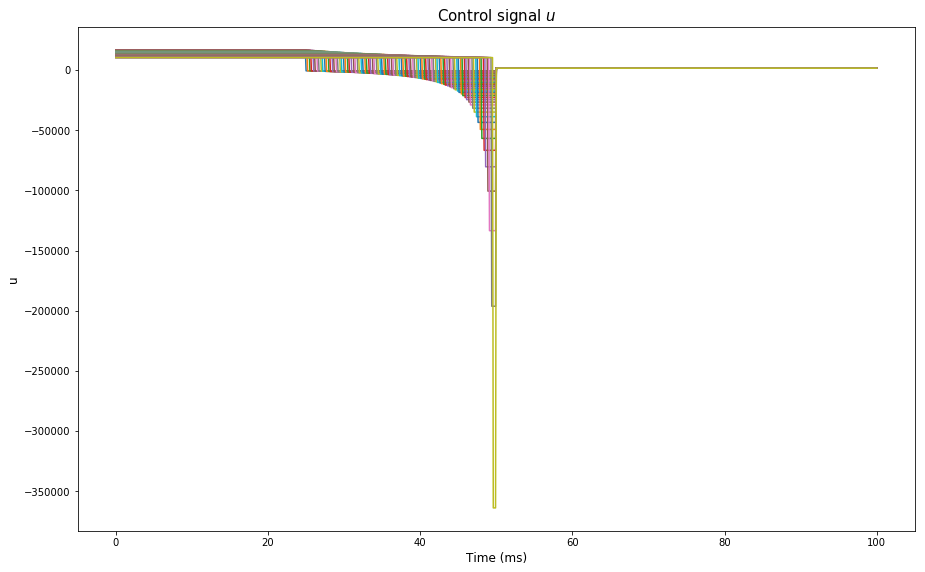

In [16]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in np.arange(n-1):
    ax.plot(time_ms, u[i,:])

print(u[i,:])
print(len(u[i,:]))
    
ax.set_title('Control signal $u$', fontsize = 15)
ax.set_xlabel('Time (ms)', fontsize=12)
ax.set_ylabel('u', fontsize=12)

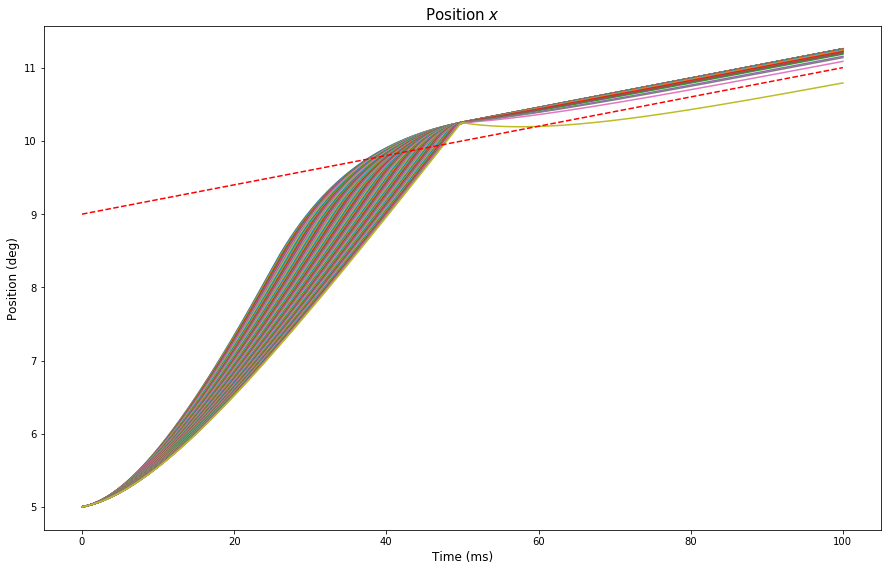

In [17]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in np.arange(n-1):
    ax.plot(time_ms,position[i,:])

ax.set_title('Position $x$', fontsize = 15)
ax.set_xlabel('Time (ms)', fontsize=12)
ax.set_ylabel('Position (deg)', fontsize=12)
    
ax.plot([0,(t_T+t_R)*1000],[xT,xT+v0*(T+R+1)*dt],'r--')

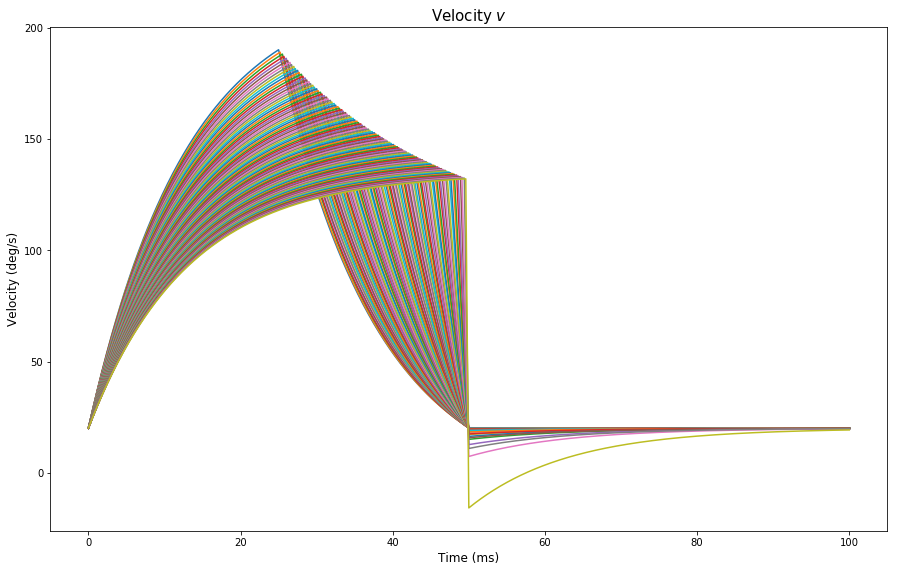

In [18]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in np.arange(n-1):
    ax.plot(time_ms, velocity[i,:])

ax.set_title('Velocity $v$', fontsize = 15)
ax.set_xlabel('Time (ms)', fontsize=12)
ax.set_ylabel('Velocity (deg/s)', fontsize=12)

In [19]:
somme = np.zeros(n-1)
for i in np.arange(n-1):
    for j in T+np.arange(R+1):
        somme[i] += variancev[i,j]

In [20]:
ind_best = np.argmin(somme)

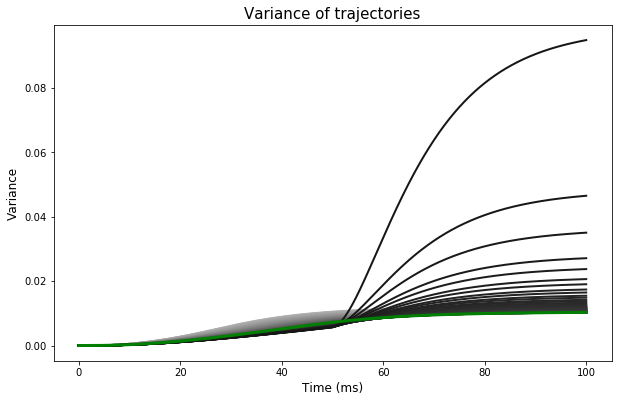

In [21]:
fig_width = 10
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
for i in np.arange(n-1):
    ax.plot(time_ms, variancev[i,:]/dt,lw=2,color=(0.7-1.6*i/255,0.7-1.6*i/255,0.7-1.6*i/255))
    ax.set_title(r'Variance of trajectories', fontsize = 15)
    ax.set_xlabel('Time (ms)', fontsize=12)
    ax.set_ylabel('Variance', fontsize=12)
ax.plot(time_ms, variancev[ind_best,:]/dt,lw=3,color='g')

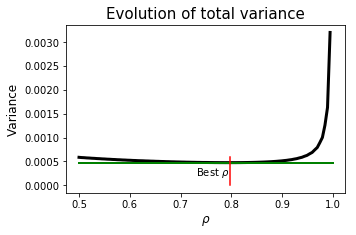

In [22]:
fig_width = 5
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(rho[0:n-1], somme,lw=3,color=(0,0,0))
ax.set_title(r'Evolution of total variance', fontsize = 15)
ax.set_xlabel(r'$\rho$', fontsize=12)
ax.set_ylabel('Variance', fontsize=12)
ax.plot([0.5,rho[n-1]],[somme[ind_best],somme[ind_best]],lw=2,color='g')
ax.plot([rho[ind_best],rho[ind_best]],[0,0.0006], color='r')
plt.text(0.73,0.0002,r'Best $\rho$', fontsize=10)

In [23]:
rho[ind_best]

0.79738383838383831

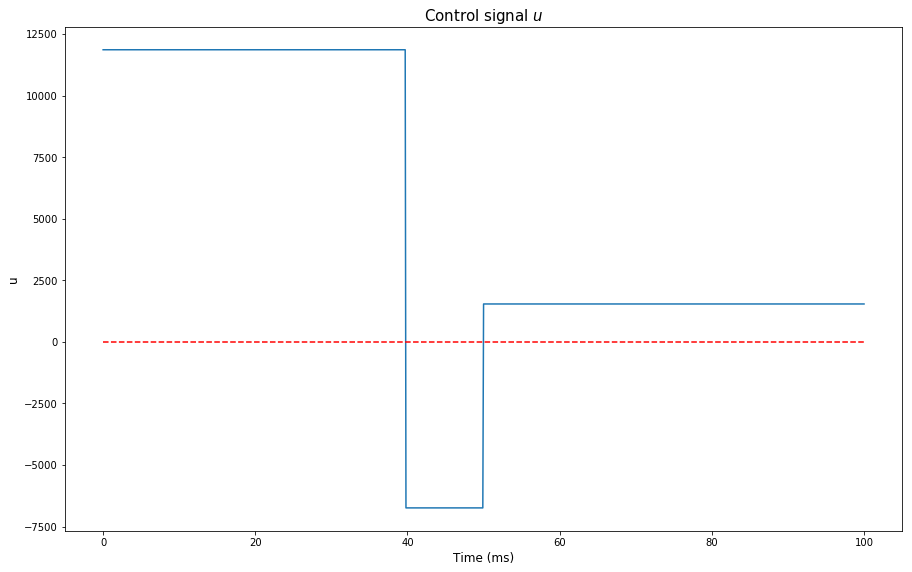

In [24]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(time_ms, u[ind_best,:])

ax.set_title('Control signal $u$', fontsize = 15)
ax.set_xlabel('Time (ms)', fontsize=12)
ax.set_ylabel('u', fontsize=12)

ax.plot([0,(t_T+t_R)*1000],[0,0],'r--')

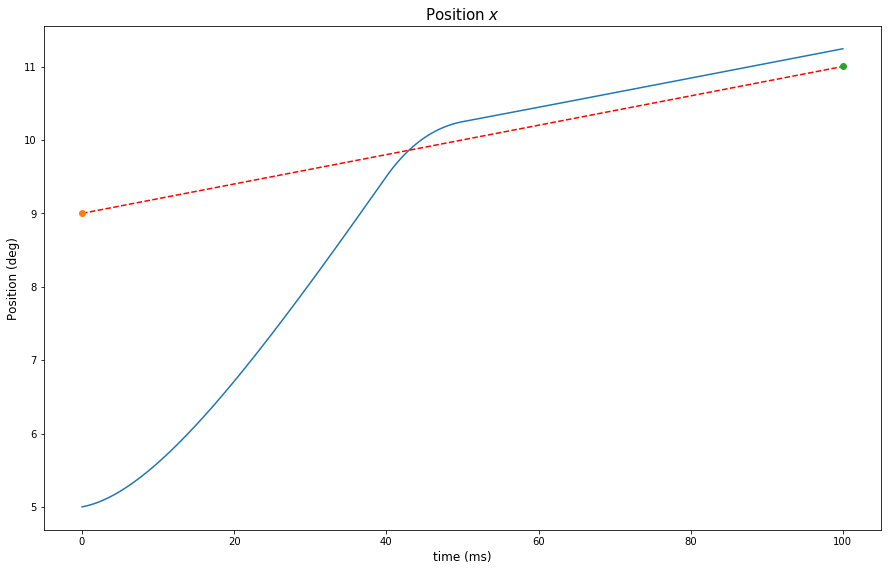

In [25]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(time_ms,position[ind_best,:])

ax.set_title('Position $x$', fontsize = 15)
ax.set_xlabel('time (ms)', fontsize=12)
ax.set_ylabel('Position (deg)', fontsize=12)

ax.plot([0,(t_T+t_R)*1000],[xT,xT+v0*(T+R+1)*dt],'r--')
ax.plot([0],[xT], marker = 'o')
ax.plot([(t_T+t_R)*1000],[xT+v0*(T+R+1)*dt], marker = 'o')

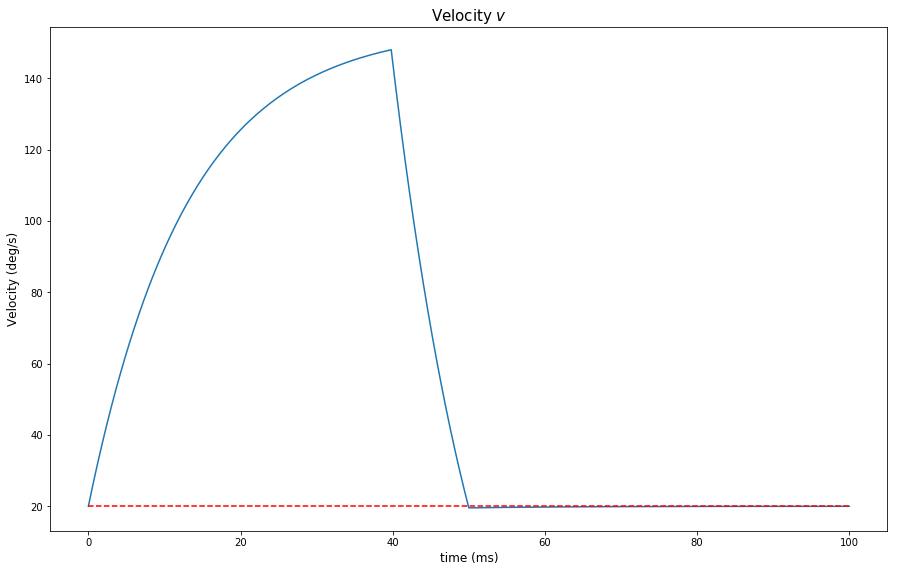

In [26]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
ax.plot(time_ms, velocity[ind_best,:])

ax.set_title('Velocity $v$', fontsize = 15)
ax.set_xlabel('time (ms)', fontsize=12)
ax.set_ylabel('Velocity (deg/s)', fontsize=12)

ax.plot([0,(t_T+t_R)*1000],[v0,v0],'r--')